In [27]:
# first we define the simulator and setup a quantum instance
import qiskit
from qiskit import Aer
from qiskit.utils import QuantumInstance

backend = Aer.get_backend('statevector_simulator')
qinstance = QuantumInstance(backend, seed_simulator=2, seed_transpiler=2)

In [28]:
# then we setup our ansatz for the wavefunction

from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(2, reps=1)
ansatz.draw()

┌──────────────────────────────────────┐
q_0: ┤0                                     ├
     │  RealAmplitudes(θ[0],θ[1],θ[2],θ[3]) │
q_1: ┤1                                     ├
     └──────────────────────────────────────┘

In [29]:
# now we have to define the observable we want the minimum eigenvalue of
from qiskit.opflow import X,Y,Z,I

observable = Z^I

In [30]:
# set-up the vqe algorithm, with an optimizer and wave function
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA

vqe = VQE(ansatz=ansatz, optimizer=COBYLA(), quantum_instance=qinstance)

In [31]:
# we could run this for many observables
result = vqe.compute_minimum_eigenvalue(observable)
print(result.eigenvalue)

(-0.9999999952504491+0j)


In [32]:
# now we have to define the observable we want the minimum eigenvalue of
from qiskit.opflow import X,Y,Z,I,H

observable = Y^I

result = vqe.compute_minimum_eigenvalue(observable)
print(result.eigenvalue)

0j


## Lets try it for the HO, should get eigenvalue 0

In [37]:
import sys
sys.path.append('..')
from src.sympy_utilities import *
from src.BinaryEncodings import *
from src.MatrixToPauliString import *
from src.qiskit_utilities import *

In [39]:
h_b_HO = 0.5*(p*p + m*m*q*q)
h_f_HO = -0.5*m#[bdag,b]

powersof2=[2**n for n in range(1,3)]

HOhams = []
for n in powersof2:
    HOhams.append({'n': n, 'ham': Hamiltonian(h_b_HO, h_f_HO, {m:1, g:1},
                  n, standard_encode)})

In [42]:
for sys in HOhams:
    obsHOHAM = pauli_string_to_op(sys['ham'].pauliStrings)
    result = vqe.compute_minimum_eigenvalue(obsHOHAM)
    #print(result.eigenvalue)
    sys['vqe']=result.eigenvalue
    
    eigSys = np.linalg.eig(np.array(sys['ham'].hamMatrix,dtype=float))
    eigVals = [en.real for en in eigSys[0]]    
    sys['exact']=np.min(np.sort(eigVals))

In [41]:
#ovec=vqe.get_optimal_vector()
#svec=qiskit.quantum_info.Statevector(ovec)
#svec.probabilities_dict()

# this will be deprecated soon

In [45]:
def fill_vqe_dict(h_b,h_f,params,sizes):
    res = []
    for n in sizes:
        res.append({'n': n, 'ham': Hamiltonian(h_b, h_f, params, n, standard_encode)})
        
    for sys in res:
        ham = pauli_string_to_op(sys['ham'].pauliStrings)
        result = vqe.compute_minimum_eigenvalue(ham)
        #print(result.eigenvalue)
        sys['vqe']=result.eigenvalue
    
        eigSys = np.linalg.eig(np.array(sys['ham'].hamMatrix,dtype=float))
        eigVals = [en.real for en in eigSys[0]]    
        sys['exact']=np.min(np.sort(eigVals))
        
    return res

In [82]:
def latex_vqe_table(data):
    s=''
    for d in data:
        s+="{} & {:.2e} & {:.2e} \\\\ \n".format(d['n'],d['exact'],d['vqe'].real)
    return s

In [76]:
ho_data=fill_vqe_dict(h_b_HO,h_f_HO,{m:1, g:1},[2**i for i in range(1,6)])
print(latex_vqe_table(ho_data))

2 & 0.0 & 4.12e-09 \\ 
4 & 0.0 & 1.93e-08 \\ 
8 & 0.0 & 3.98e-08 \\ 
16 & 0.0 & 6.97e-05 \\ 
32 & 0.0 & 1.83e-07 \\ 



## AHO

In [77]:
h_b_AHO = 0.5*(p*p) + 0.5*(m*q+g*q**3)**2
h_f_AHO = -0.5*(m+3*g*q*q)#[bdag,b]

hamAHO = Hamiltonian(h_b_AHO, h_f_AHO, {m: 1, g:1},
                    2**4, standard_encode)

In [83]:
ho_data=fill_vqe_dict(h_b_AHO,h_f_AHO, {m:1, g:1},[2**i for i in range(1,6)])
print(latex_vqe_table(ho_data))

2 & 9.38e-01 & 9.38e-01 \\ 
4 & 1.27e-01 & 1.27e-01 \\ 
8 & 2.93e-02 & 1.08e+00 \\ 
16 & 1.83e-03 & 2.40e-01 \\ 
32 & 1.83e-05 & 2.13e+00 \\ 



In [21]:
min(np.linalg.eig(getMatrix(hamAHO.pauliStrings))[0])

(0.0018302984872818303+0j)

In [22]:
from src.qiskit_utilities import *

obsAHOHAM = pauli_string_to_op(hamAHO.pauliStrings)

result = vqe.compute_minimum_eigenvalue(obsAHOHAM)
print(result.eigenvalue)

(5.717540576783264+0j)


In [23]:
result = vqe.compute_minimum_eigenvalue(obsAHOHAM)
print(result.eigenvalue)

(1.7823959804797105+0j)


In [24]:
result = vqe.compute_minimum_eigenvalue(obsAHOHAM)
print(result.eigenvalue)

(0.46061797090306666+0j)


In [25]:
result = vqe.compute_minimum_eigenvalue(obsAHOHAM)
print(result.eigenvalue)

(0.2604758894901644+0j)


In [26]:
result = vqe.compute_minimum_eigenvalue(obsAHOHAM)
print(result.eigenvalue)

(0.6076569982337852+0j)


## DW

In [80]:
h_b_DW = 0.5*(p*p + (m*q + g*(q*q + mu*mu))**2)
h_f_DW = -0.5*(m+2*g*q)#[bdag,b]

hamDW = Hamiltonian(h_b_DW, h_f_DW, {m: 1, g:1, mu: 1},
                    2**2, standard_encode)

#print(hamDW.pauliStrings)

In [84]:
dw_data=fill_vqe_dict(h_b_DW,h_f_DW, {m:1, g:1, mu: 1},[2**i for i in range(1,6)])
print(latex_vqe_table(dw_data))

2 & 1.08e+00 & 1.09e+00 \\ 
4 & 9.15e-01 & 9.22e-01 \\ 
8 & 8.93e-01 & 1.09e+00 \\ 
16 & 8.92e-01 & 9.16e-01 \\ 
32 & 8.92e-01 & 1.42e+00 \\ 



In [30]:
min(np.linalg.eig(getMatrix(hamDW.pauliStrings))[0])

(0.9150368745234885+0j)

In [31]:
from src.qiskit_utilities import *

obsDWHAM = pauli_string_to_op(hamDW.pauliStrings)

result = vqe.compute_minimum_eigenvalue(obsDWHAM)
print(result.eigenvalue)

(0.915037296459897+0j)


In [32]:
ovec=vqe.get_optimal_vector()

In [33]:
svec=qiskit.quantum_info.Statevector(ovec)
svec.probabilities_dict()

{'000': 1.6851770587149615e-07,
 '001': 0.9308262658622767,
 '010': 7.115680083669937e-08,
 '011': 0.025261628623459716,
 '100': 7.4165052265467824e-09,
 '101': 0.04050070625065358,
 '110': 9.033805859605173e-09,
 '111': 0.0034111431387918206}

In [34]:
result = vqe.compute_minimum_eigenvalue(obsDWHAM)
print(result.eigenvalue)
ovec=vqe.get_optimal_vector()
svec=qiskit.quantum_info.Statevector(ovec)
svec.probabilities_dict()

(0.9206455004985781+0j)


{'000': 3.510296758507209e-05,
 '001': 0.9359124930005759,
 '010': 8.660287945231982e-05,
 '011': 0.024408791219270174,
 '100': 4.984918495570127e-07,
 '101': 0.037678633089239105,
 '110': 0.00020085632684951814,
 '111': 0.0016770220251785344}

In [35]:
result = vqe.compute_minimum_eigenvalue(obsDWHAM)
print(result.eigenvalue)
ovec=vqe.get_optimal_vector()
svec=qiskit.quantum_info.Statevector(ovec)
svec.probabilities_dict()

(0.9589992066493376+0j)


{'000': 0.6831570462413757,
 '001': 2.1135121239124224e-06,
 '010': 0.006899942929110987,
 '011': 3.932323398314501e-09,
 '100': 0.3062609338241454,
 '101': 1.023794112824085e-06,
 '110': 0.0036788224329998907,
 '111': 1.1333380760274167e-07}

In [36]:
result = vqe.compute_minimum_eigenvalue(obsDWHAM)
print(result.eigenvalue)
ovec=vqe.get_optimal_vector()
svec=qiskit.quantum_info.Statevector(ovec)
svec.probabilities_dict()

(0.9150370021665823+0j)


{'000': 2.0736637925922718e-07,
 '001': 0.9308565450047819,
 '010': 5.602672209934858e-09,
 '011': 0.025240901106253842,
 '100': 9.019836473924021e-09,
 '101': 0.040492490510343544,
 '110': 7.580236389794535e-10,
 '111': 0.0034098406317088726}

In [38]:
print(vqe.print_settings())


==================== Setting of VQE ============================
Algorithm: VQE
-- quantum_instance: 
Qiskit Terra version: 0.18.3
Backend: 'statevector_simulator (AerProvider)', with following setting:
{'basis_gates': ['ccx', 'cp', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'delay', 'diagonal', 'h', 'id', 'initialize', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'kraus', 'roerror', 'save_amplitudes', 'save_amplitudes_sq', 'save_density_matrix', 'save_expval', 'save_probs', 'save_probs_ket', 'save_state', 'save_statevector', 'set_statevector'], 'coupling_map': None}
{'initial_layout': None, 'seed_transpiler': 2, 'optimization_level': None}
RunConfig(shots=1, max_credits=10, seed_simulator=2)
{'timeout': None}
{}
{}
Measur

In [54]:
data = [] 

for i in range(0,200):
    result = vqe.compute_minimum_eigenvalue(obsDWHAM)
    data.append(result.eigenvalue.real)

In [52]:
data

[0.9589981217635131,
 0.9589981150269893,
 0.958998666607006,
 0.9150370248593873,
 0.9150714306665624,
 0.9150894789257468,
 0.9589983864926835,
 0.9157406335255055,
 0.915036966507894,
 0.9589988276524918,
 0.9150372462539165,
 0.9589987788304403,
 0.9150369255682379,
 0.9150374015945969,
 0.9589986033110738,
 0.915037024190466,
 0.9150893056436396,
 0.9589997095768212,
 0.9150767144974857,
 0.9150369560331075]

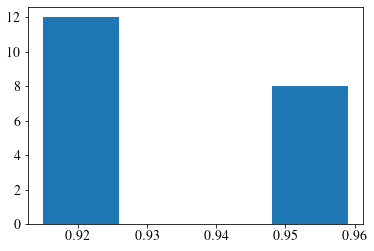

In [53]:
import numpy as np
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(data, 4)
plt.show()